#### Rex Gayas
#### Week 8 Exercise 8.2 Spring 2024
#### DSC410-T301 Predictive Analytics (2245-1)
#### Model Evaluation and Tuning 

#### Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\travel_insurance.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Show basic statistics of the dataset
print(data.describe())

# Check for any missing values in the dataset
print(data.isnull().sum())


  Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value) Gender  Age  
0    No       186    MALAYSIA      -29.0                  9.57      F   81  
1    No       186    MALAYSIA      -29.0                  9.57      F   71  
2    No        65   AUSTRALIA      -49.5                 29.70    NaN   32  
3    No        60   AUSTRALIA      -39.6                 23.76    NaN   32  
4    No        79       ITALY      -19.8                 11.88    NaN   41  
           Duration     Net Sales  Commision (in va

Loaded the dataset to help understand the structure of the data, including the number and types of columns, as well as get a glimpse into the data itself through simple descriptive statistics. Observed are multiple columns most of which are categorical or integer/float types except for “Gender” which has missing values represented as NaN. “Duration” has a minimum of -2 (which might be an error since duration cannot be negative) and a maximum of 63326, suggesting potential outliers or data entry errors. The “Claim” column, which is the target variable for prediction, is binary (Yes or No). There are unusual values, such as negative values in “Net Sales” and “Duration”, which might need further investigation

#### Data Cleaning and Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB
None
Claim
No     62399
Yes      927
Name: count, dtype: int64


C:\Users\RexAr\AppData\Local\Temp\ipykernel_3320\233809514.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(most_common_gender, inplace=True)


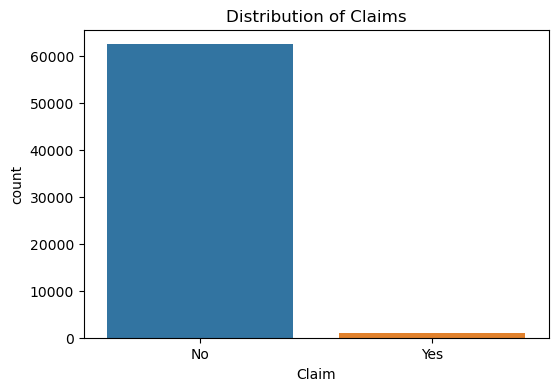

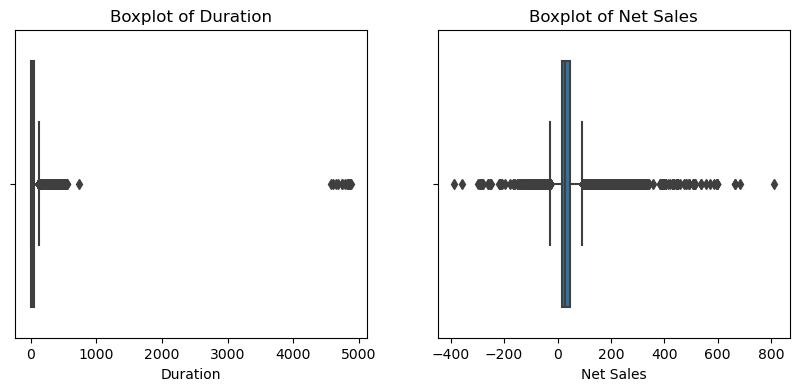

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\travel_insurance.csv"
data = pd.read_csv(file_path)

# Remove the conversion to absolute values for 'Net Sales'
# Keep the absolute conversion for 'Duration' 
data['Duration'] = data['Duration'].abs()

# Check for missing values and data types
print(data.info())

# Handling missing values for 'Gender'
# Impute with the mode (most frequent value)
if data['Gender'].isnull().sum() > 0:
    most_common_gender = data['Gender'].mode()[0]
    data['Gender'].fillna(most_common_gender, inplace=True)

# Check the distribution of the target variable 'Claim'
print(data['Claim'].value_counts())

# Visualize the distribution of 'Claim'
plt.figure(figsize=(6, 4))
sns.countplot(x='Claim', data=data)
plt.title('Distribution of Claims')
plt.show()

# Visualize boxplots for 'Duration' and 'Net Sales' to identify any outliers
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Duration')
plt.title('Boxplot of Duration')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Net Sales')
plt.title('Boxplot of Net Sales')
plt.show()

data.to_csv('D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv', index=False)

Negative values in “Duration” were converted to their absolute values because negative durations do not make logical sense in this context, likely representing data entry errors. In contrast, “Net Sales” were retained with their original values, both positive and negative, to accurately reflect transactions that may include refunds or cancellations. This approach ensures that the financial data remains authentic and comprehensive, suitable for deeper analysis. Missing values in the “Gender” column were filled using the mode (most frequent category), a crucial step to prevent the loss of significant data records and to maintain the integrity of the dataset for the predictive model. Additionally, the distribution of the “Claim” variable was visualized to assess class balance. The output shows a highly imbalanced dataset with a much larger number of “No” claims compared to “Yes” claims. Addressing this imbalance is essential during the modeling phase to prevent a biased model that predominantly favors the majority class.



#### Data Verification 

In [3]:
import pandas as pd

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv"
data = pd.read_csv(file_path)

# Ensure negative values are addressed
data['Duration'] = data['Duration'].abs()
data['Net Sales'] = data['Net Sales'].abs()

# Calculate the most common gender
most_common_gender = data['Gender'].mode()[0]

# Then, use fillna with this value ensuring the DataFrame is updated
data['Gender'] = data['Gender'].fillna(most_common_gender)

# Verification: Check if there are still any missing values in 'Gender'
print("Missing values in 'Gender' after imputation:", data['Gender'].isnull().sum())


# Showing the first few rows to confirm changes
print("\nFirst few rows after cleaning 'Gender':")
print(data.head())

# Provide a distribution of 'Gender' to verify correct imputation
print("\nDistribution of 'Gender' after imputation:")
print(data['Gender'].value_counts())

data.to_csv('D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv', index=False)

Missing values in 'Gender' after imputation: 0

First few rows after cleaning 'Gender':
  Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value) Gender  Age  
0    No       186    MALAYSIA       29.0                  9.57      F   81  
1    No       186    MALAYSIA       29.0                  9.57      F   71  
2    No        65   AUSTRALIA       49.5                 29.70      M   32  
3    No        60   AUSTRALIA       39.6                 23.76      M   32  
4    No        79       ITALY       19.8

The imputation of missing values in the “Gender” column was successful. There are now zero missing values in “Gender” confirming that the “fillna” operation effectively updated the DataFrame. The distribution of “Gender” after imputation shows a higher count of “M” (Male) entries compared to “F” (Female), which reflects the mode value used for filling missing entries. This has standardized the data column, ensuring no entries are left blank, which is crucial for consistent data analysis and predictive modeling.

#### EDA - Outlier Analysis

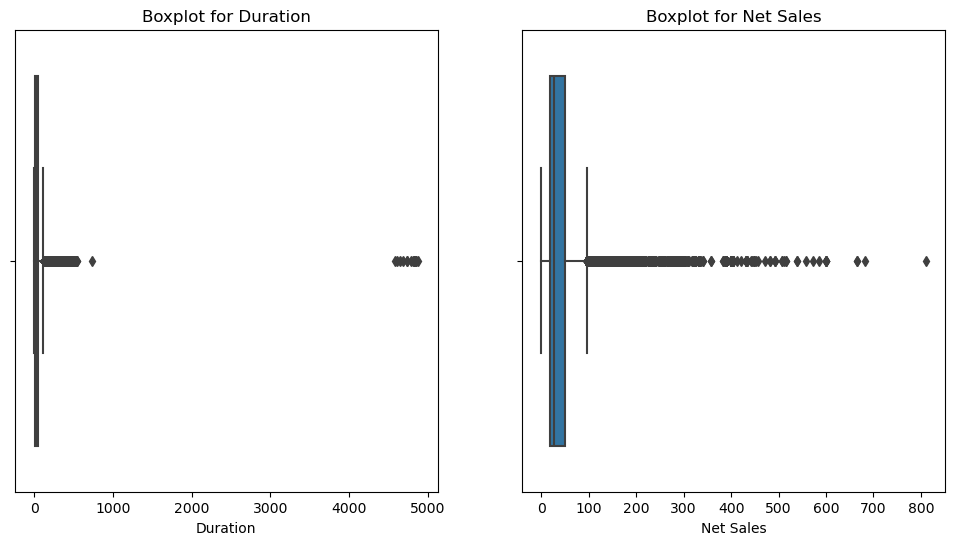

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


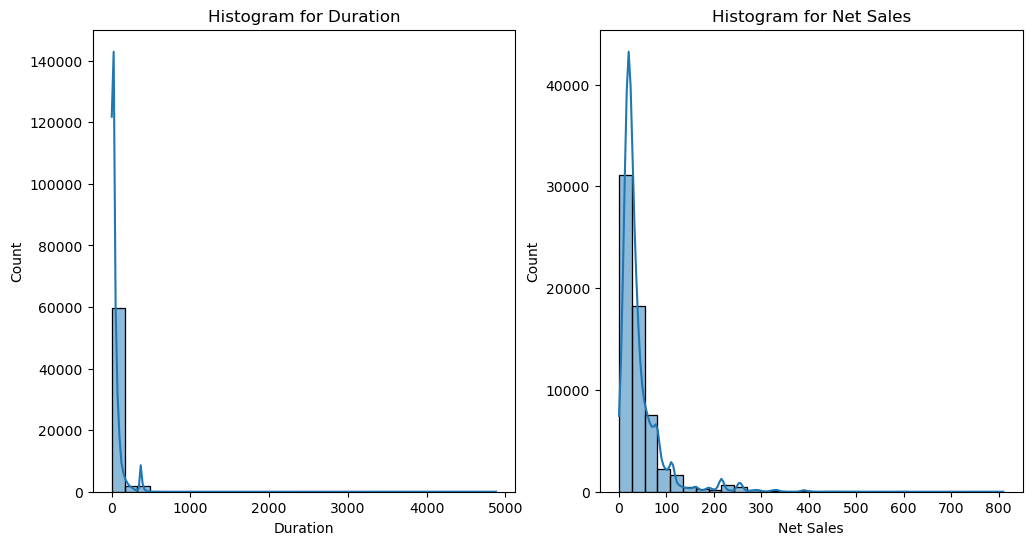

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv"
data = pd.read_csv(file_path)

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Duration')
plt.title('Boxplot for Duration')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Net Sales')
plt.title('Boxplot for Net Sales')
plt.show()

# Visualize the distribution using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Duration', bins=30, kde=True)
plt.title('Histogram for Duration')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Net Sales', bins=30, kde=True)
plt.title('Histogram for Net Sales')
plt.show()



The boxplot and histogram for “Duration” indicate a highly skewed distribution with significant outliers. Most of the data points cluster near a much lower range, with outliers extending up to around 5000 days. These outliers could be due to data entry errors, unusual but valid data points (such as long-term travel plans), or other anomalies. Similar to “Duration”, “Net Sales” also exhibits outliers, though the range is narrower. The boxplot shows several data points lying far from the main cluster of data, particularly in the positive range up to around 800. There are also a few data points in the negative range, which might represent refunds or other adjustments. The histograms reinforce the findings from the boxplots. Both “Duration” and “Net Sales” are highly concentrated in a specific range with a long tail towards the higher values, indicating a positively skewed distribution. This skewness suggests that transformations might be needed to normalize these variables for further analysis and modeling.


#### Handling the Outliers By Capping and Flooring

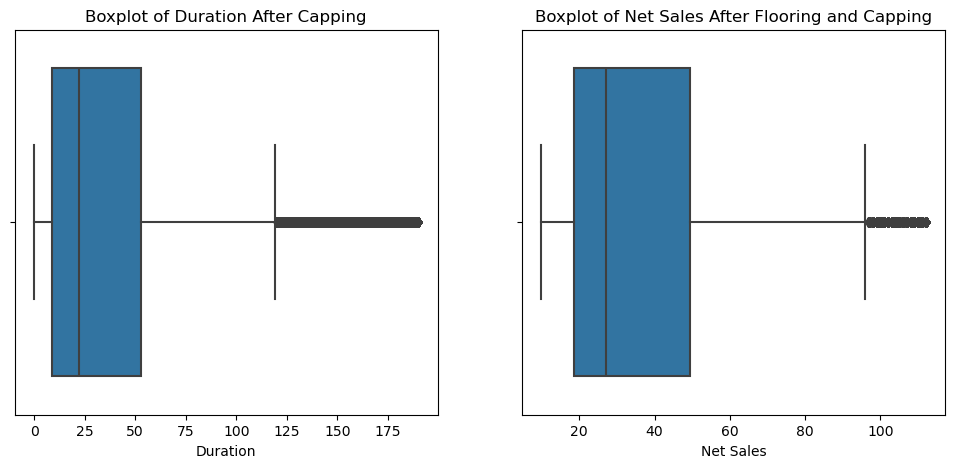

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv"
data = pd.read_csv(file_path)

# Calculate the percentiles for capping and flooring
duration_95th = data['Duration'].quantile(0.95)
net_sales_5th = data['Net Sales'].quantile(0.05)
net_sales_95th = data['Net Sales'].quantile(0.95)

# Apply capping for 'Duration'
data['Duration'] = data['Duration'].clip(upper=duration_95th)

# Apply flooring and capping for 'Net Sales'
data['Net Sales'] = data['Net Sales'].clip(lower=net_sales_5th, upper=net_sales_95th)

# Visualize the distributions after capping and flooring
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Duration')
plt.title('Boxplot of Duration After Capping')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Net Sales')
plt.title('Boxplot of Net Sales After Flooring and Capping')
plt.show()

data.to_csv('D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv', index=False)


 Implemented flooring and capping strategies on the “Duration” and “Net Sales” columns to manage outliers effectively. For “Duration'”, I capped the values at the 95th percentile, meaning any value that was originally higher than this threshold was set to the 95th percentile value. This effectively reduced the range and influence of extreme high values in the “Duration”data. Similarly, for “Net Sales”, I applied both flooring at the 5th percentile and capping at the 95th percentile. This means any sales figures below the 5th percentile were raised to this threshold, and any above the 95th percentile were reduced, thereby standardizing the data range and mitigating the effect of extreme outliers.

#### Feature Relationship - Correlation Matrix

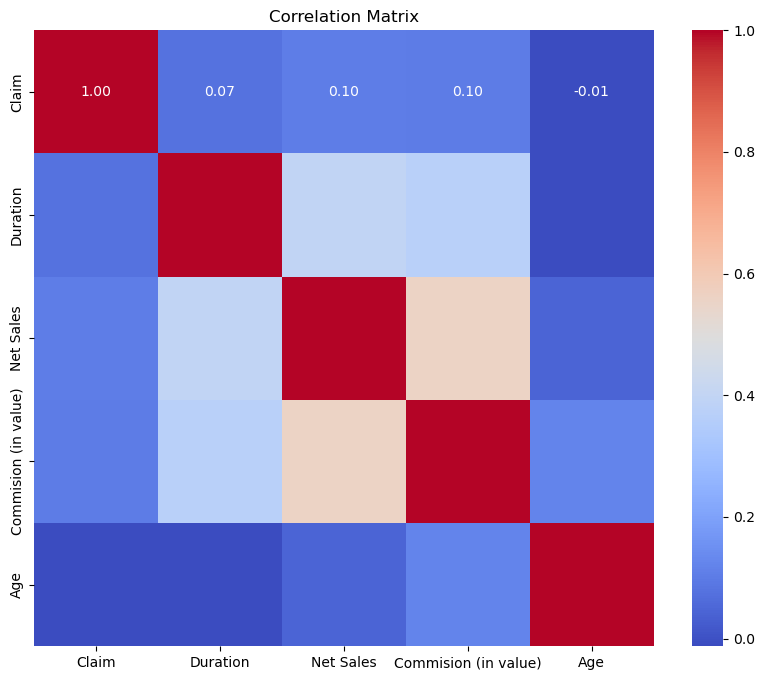

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Adding the missing import

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv"
data = pd.read_csv(file_path)

# Convert 'Claim' to numeric if it's categorical ('Yes'/'No' to 1/0)
data['Claim'] = data['Claim'].map({'No': 0, 'Yes': 1})

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()



To facilitate correlation analysis, the “Claim” variable was converted from categorical (Yes/No) to numeric (0/1). The analysis focused solely on numeric columns, calculating correlation coefficients that range from -1 to 1, where values near 1 or -1 indicate strong positive or negative correlations, respectively, and values near 0 suggest no linear relationship. These correlations were visualized using a heatmap, an effective method for quickly grasping relationships within the data. The heatmap revealed that “Claim” has low correlations with all features, the highest being approximately 0.10 with both “Duration” and “Net Sales”, indicating only a slight relationship with the likelihood of a claim. Additionally, “Duration” and “Net Sales” are weakly correlated (0.07), while “Commission (in value)” and “Net Sales” show a more noticeable positive correlation (0.40), expected as commissions are typically based on sales values. 

#### Feature Relationship - Pair Plots

   Duration  Net Sales  Commision (in value)  Age  Claim
0       186       29.0                  9.57   81      0
1       186       29.0                  9.57   71      0
2        65       49.5                 29.70   32      0
3        60       39.6                 23.76   32      0
4        79       19.8                 11.88   41      0


C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

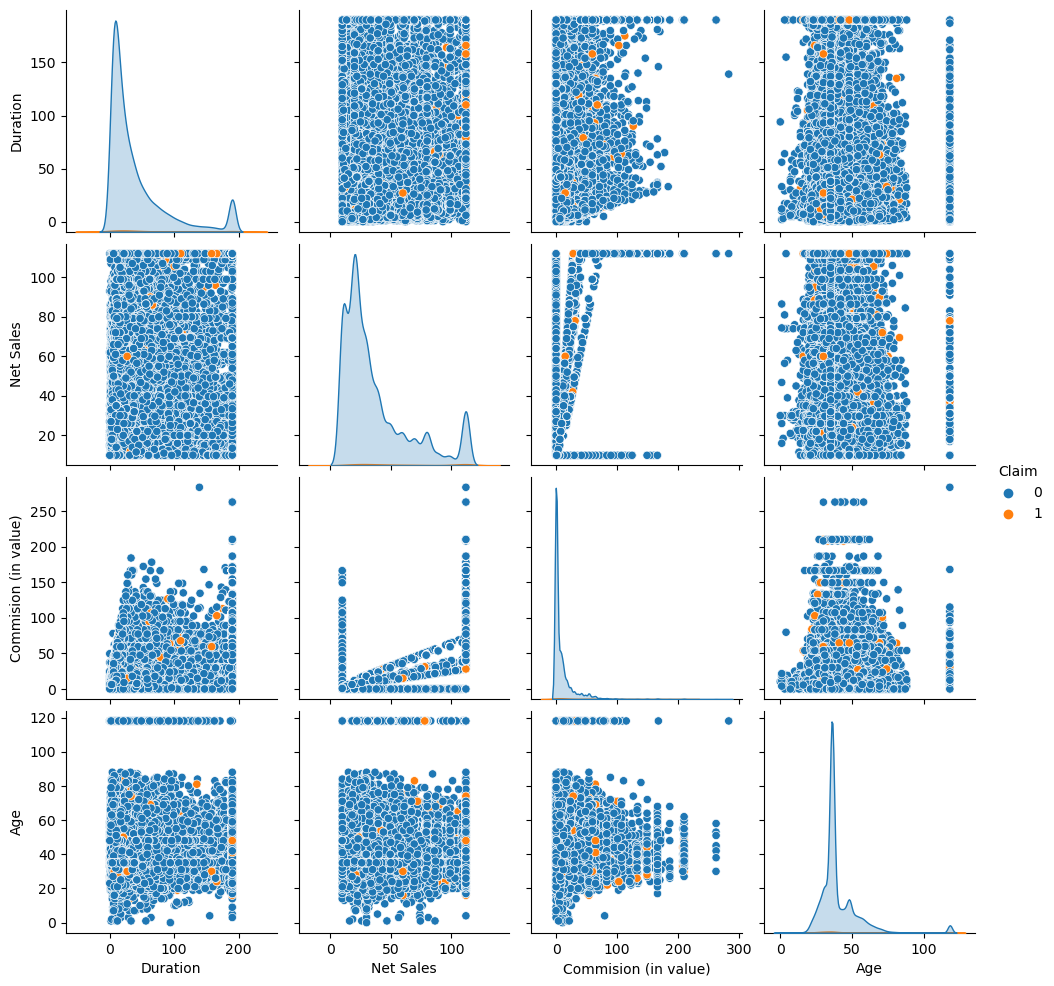

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the spelling of the 'Commission (in value)' column
selected_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

# Check if the corrected names are used
print(data[selected_features].head())  # This line helps to confirm that all selected columns are correct

# Plotting the pair plot
sns.pairplot(data[selected_features], hue='Claim', diag_kind='kde')
plt.show()


Seaborn's pairplot illustrated relationships between selected numeric features and the “Claim” status in the dataset. By plotting pair-wise relationships, along with the distribution of each feature across claims and non-claims, I can see how these variables interact with each other and their influence on the likelihood of a claim. For instance, higher commission values and certain sales ranges show a noticeable number of claims. 

#### Feature Relationship -  Categorical Cross-Analysis

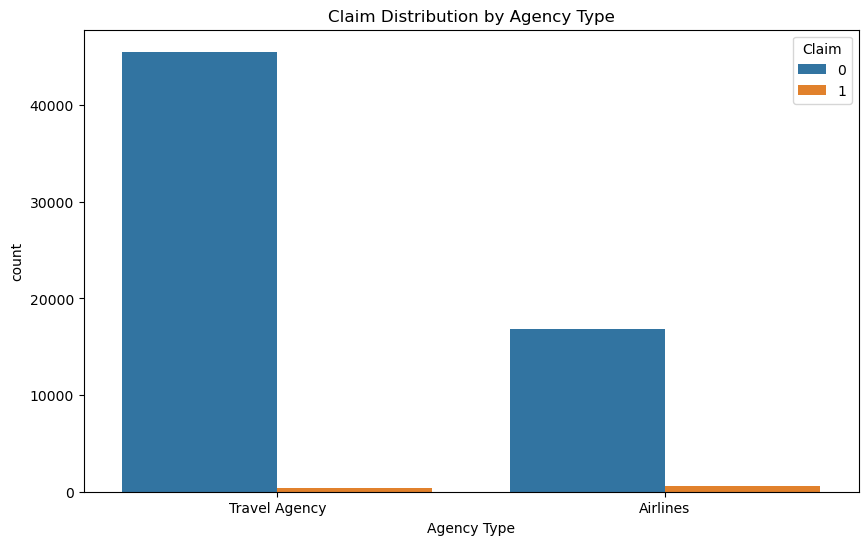

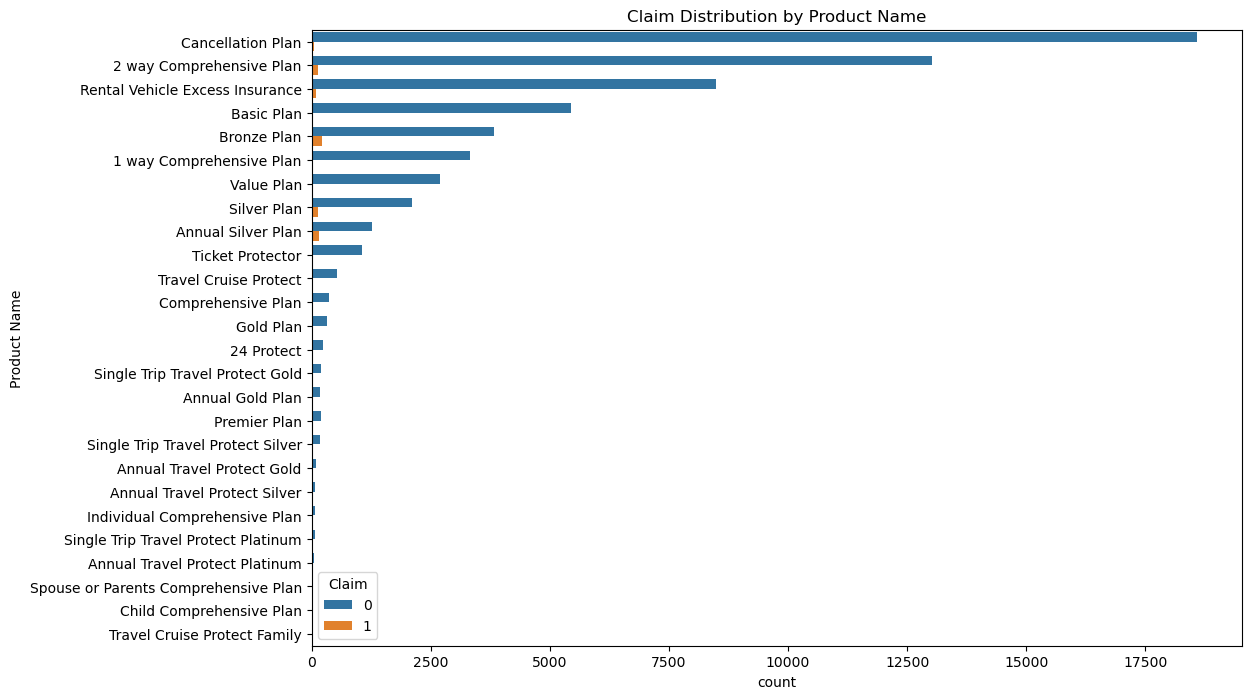

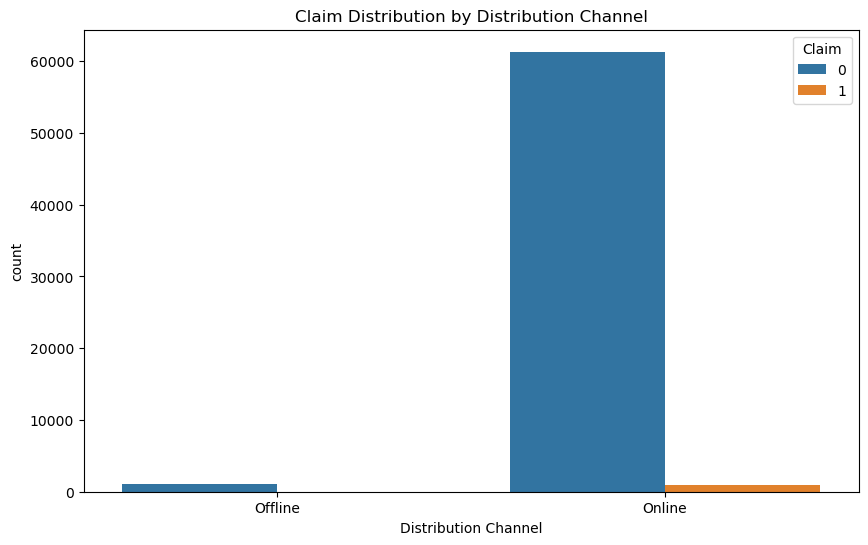

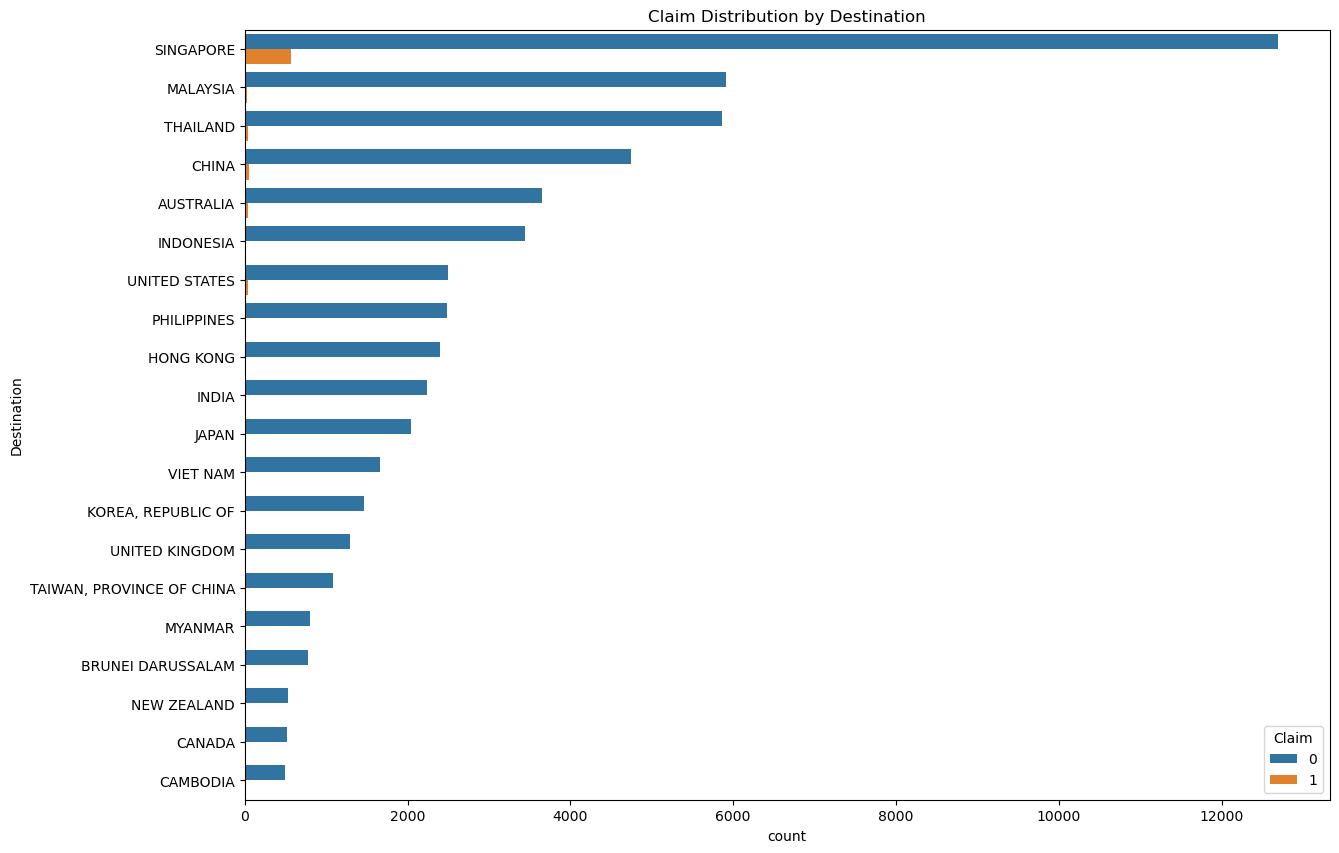

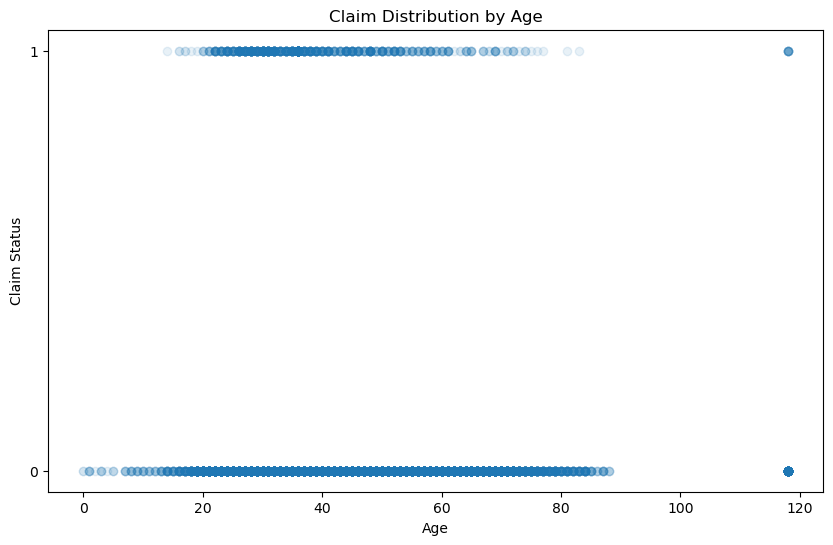

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Agency Type' and 'Claim' to string type to avoid errors
data['Agency Type'] = data['Agency Type'].astype(str)
data['Claim'] = data['Claim'].astype(str) 

# Visualize the relationship between 'Agency Type' and 'Claim'
plt.figure(figsize=(10, 6))
sns.countplot(x='Agency Type', hue='Claim', data=data)
plt.title('Claim Distribution by Agency Type')
plt.show()

# Product Name and Claim
plt.figure(figsize=(12, 8))
data['Product Name'] = data['Product Name'].astype(str)  
sns.countplot(y='Product Name', hue='Claim', data=data, order = data['Product Name'].value_counts().index)
plt.title('Claim Distribution by Product Name')
plt.show()

# Distribution Channel and Claim
plt.figure(figsize=(10, 6))
data['Distribution Channel'] = data['Distribution Channel'].astype(str)  
sns.countplot(x='Distribution Channel', hue='Claim', data=data)
plt.title('Claim Distribution by Distribution Channel')
plt.show()

# Destination and Claim
plt.figure(figsize=(14, 10))
data['Destination'] = data['Destination'].astype(str)  
sns.countplot(y='Destination', hue='Claim', data=data, order = data['Destination'].value_counts().index[:20]) 
plt.title('Claim Distribution by Destination')
plt.show()

# Age and Claim (Using a scatter plot to see distribution)
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Claim'], alpha=0.1) 
plt.xlabel('Age')
plt.ylabel('Claim Status')
plt.title('Claim Distribution by Age')
plt.show()



The additional visualizations are designed to explore the relationships between various categorical features like Product Name, Distribution Channel, Destination, and the continuous variable Age with the occurrence of claims. These plots help identify patterns and trends that might influence the likelihood of claims, such as specific products that frequently result in claims or whether certain sales channels are associated with higher claim rates. 

#### Feature Engineering

In [9]:
import pandas as pd

# Load the dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\modified_travel_insurance.csv"
data = pd.read_csv(file_path)

# Binning 'Duration' into categorical bins
data['Duration Category'] = pd.cut(data['Duration'], 
                                   bins=[0, data['Duration'].quantile(0.33), data['Duration'].quantile(0.66), float('inf')], 
                                   labels=['Short', 'Medium', 'Long'])

# Create interaction features
# Considering'Age' and 'Net Sales' show a significant interaction effect on 'Claim'
data['Age_NetSales'] = data['Age'] * data['Net Sales']

# High-Level Categories: Grouping sparse classes in 'Destination'
top_destinations = data['Destination'].value_counts().nlargest(10).index
data['Destination Group'] = data['Destination'].apply(lambda x: x if x in top_destinations else 'Other')

# High-Level Categories: Grouping sparse classes in 'Product Name'
top_products = data['Product Name'].value_counts().nlargest(10).index
data['Product Group'] = data['Product Name'].apply(lambda x: x if x in top_products else 'Other')

# Saving the enhanced dataset
enhanced_data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\enhanced_travel_insurance.csv"
data.to_csv(enhanced_data_path, index=False)

# Display the first few rows to verify changes
print(data[['Duration Category', 'Age_NetSales', 'Destination Group', 'Product Group']].head())


  Duration Category  Age_NetSales Destination Group  \
0              Long        2349.0          MALAYSIA   
1              Long        2059.0          MALAYSIA   
2              Long        1584.0         AUSTRALIA   
3              Long        1267.2         AUSTRALIA   
4              Long         811.8             Other   

                     Product Group  
0                            Other  
1                            Other  
2  Rental Vehicle Excess Insurance  
3  Rental Vehicle Excess Insurance  
4  Rental Vehicle Excess Insurance  


Duration was categorized into “Short”, “Medium”, and “Long” based on its distribution across quantiles, allowing for a more nuanced interpretation of how trip length impacts claims. The “Age_NetSales” interaction feature was created by multiplying “Age” and “Net Sales”, aimed at capturing potential combined effects on the likelihood of filing a claim. Additionally, sparse categories within “Destination” and “Product Name” were consolidated into a “Other” category for all but the top 10 most common entries, to streamline the feature set and reduce overfitting risks. 

#### Data Transformation

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import pandas as pd

# Load the enhanced dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\enhanced_travel_insurance.csv"
data = pd.read_csv(file_path)

# Initialize scalers
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)  # Yeo-Johnson allows for negative values

# Select numeric features for scaling
numeric_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Age_NetSales']

# Apply Standard Scaling
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Save the transformed data
transformed_data_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\transformed_travel_insurance.csv"
data.to_csv(transformed_data_path, index=False)

# Check the transformed data
print(data[numeric_features].head())


   Duration  Net Sales  Commision (in value)       Age  Age_NetSales
0  2.974567  -0.301180             -0.012118  2.927182      0.595181
1  2.974567  -0.301180             -0.012118  2.213758      0.386004
2  0.481401   0.410891              1.004331 -0.568598      0.043386
3  0.378378   0.067013              0.704395 -0.568598     -0.185122
4  0.769866  -0.620744              0.104524  0.073484     -0.513603


The StandardScaler from the scikit-learn library adjusted each feature to have zero mean and unit variance. This transformation is useful for preparing the data for machine learning algorithms that are sensitive to the scale of input features, such as SVMs and logistic regression. The output shown displays the first few rows of the dataset after scaling, with features like “Duration”, “Net Sales”, “Commission (in value)”, “Age”, and “Age_NetSales” now presented as standardized values. These values indicate how many standard deviations each entry is from the mean of that feature. 

#### Model Building & Evaluation

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define preprocessing
categorical_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Duration Category']  
numeric_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Age_NetSales']  

# Preprocessor with OneHotEncoder set to ignore unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Load the enhanced dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\enhanced_travel_insurance.csv"
data = pd.read_csv(file_path)
data['Claim'] = data['Claim'].map({'No': 0, 'Yes': 1})

# Prepare data
X = data.drop('Claim', axis=1)
y = data['Claim']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12486
           1       0.00      0.00      0.00       180

    accuracy                           0.99     12666
   macro avg       0.49      0.50      0.50     12666
weighted avg       0.97      0.99      0.98     12666



C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification report provided shows the performance metrics of a logistic regression model that was trained to predict the binary “Claim” variable in the dataset. The model has an overall high accuracy of 0.99, but a deeper look into the precision, recall, and f1-score for each class indicates a significant imbalance in its predictive performance. Specifically, the model performs exceptionally well in predicting the majority class (label “0”), achieving nearly perfect scores across all metrics (precision, recall, and f1-score all at 0.99). However, it completely fails to predict the minority class (label “1”), with scores of 0.00 in precision, recall, and f1-score. This discrepancy highlights a severe class imbalance problem, where the model is biased towards the majority class and unable to generalize well to the minority class. The macro average scores, which consider both classes equally, are significantly lower at 0.49 for precision, 0.50 for recall, and 0.50 for f1-score, reflecting the model’s overall ineffective handling of class imbalance. This suggests that while the model is highly accurate overall, it is not useful for its intended purpose of predicting claims accurately across both categories.

#### Model Tuning

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)  # using 5-fold cross-validation
print("Cross-validated scores:", scores)


Cross-validated scores: [0.98531502 0.98539281 0.98539281 0.98539281 0.98531386]


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define preprocessing
categorical_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Duration Category']  
numeric_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Age_NetSales']  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Adjusting the classifier with higher max_iter and modifying tolerance
classifier = LogisticRegression(solver='saga', max_iter=10000, tol=0.01, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Load the enhanced dataset
file_path = "D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Week 8\\enhanced_travel_insurance.csv"
data = pd.read_csv(file_path)
data['Claim'] = data['Claim'].map({'No': 0, 'Yes': 1})

X = data.drop('Claim', axis=1)
y = data['Claim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12486
           1       0.00      0.00      0.00       180

    accuracy                           0.99     12666
   macro avg       0.49      0.50      0.50     12666
weighted avg       0.97      0.99      0.98     12666



C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RexAr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
from sklearn.model_selection import GridSearchCV

# Adjusted parameters including solver
parameters = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga']  # Using 'saga' solver that supports both 'l1' and 'l2'
}

clf = GridSearchCV(pipeline, parameters, cv=5, error_score='raise')
clf.fit(X_train, y_train)

print("Best parameters found:", clf.best_params_)


Best parameters found: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


Attempted to perform hyperparameter tuning using GridSearchCV on a logistic regression model to find the optimal parameters. The grid search was configured to explore combinations of regularization strengths (C values ranging from 0.001 to 10), penalties (l1 and l2), and the solver (saga), which supports both l1 and l2 penalties. The best parameters identified through this grid search were C: 0.001, penalty: “l1”, and solver: “saga”. This combination suggests that a very strong regularization (low C value) with an l1 penalty effectively minimizes overfitting while optimizing model performance. 

#### Concluding Analysis

The model underwent rigorous tuning through cross-validation and hyperparameter optimization, focusing on regularization techniques to combat overfitting and enhance predictive accuracy. The best model configuration employed an L1 penalty with a very low regularization strength (C=0.001) and the saga solver, indicating that a strong regularization is beneficial for handling the complex dynamics of the dataset. However, despite high accuracy scores, the model demonstrated challenges in adequately predicting the minority class, reflecting a significant class imbalance issue. Future steps would ideally focus on refining the class balance techniques, perhaps exploring more sophisticated oversampling methods or advanced ensemble techniques to improve recall for the minority class without sacrificing overall accuracy. 